In [ ]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2023-01-26 07:54:37--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-01-26 07:54:38--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-01-26 07:54:38--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9352

In [ ]:
#!unzip covid_19

In [ ]:
import keras 

from keras.models import *
from keras.layers import *
from keras.preprocessing import image 
from tensorflow.keras.applications import DenseNet121,ResNet50V2 


import PIL

In [ ]:
# Download the architecture of DenseNet121 with ImageNet weights
base_model = DenseNet121(include_top=False, weights='imagenet')
 
x = base_model.output
x = GlobalAveragePooling2D()(x)  # as a faltten 
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
results=model.fit_generator(
    training_set,
    steps_per_epoch=2,
    epochs=20,
    validation_data=test_set,
    validation_steps=2
)

<ipython-input-9-1348129c9d6d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=model.fit_generator(


Epoch 1/20
2/2 [==============================] - 14s 7s/step - loss: 2.3851 - accuracy: 0.4062 - val_loss: 1.1589 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 4s 3s/step - loss: 0.8939 - accuracy: 0.6094 - val_loss: 1.0284 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 4s 3s/step - loss: 0.8281 - accuracy: 0.5938 - val_loss: 0.1267 - val_accuracy: 0.9833
Epoch 4/20
2/2 [==============================] - 5s 4s/step - loss: 0.2017 - accuracy: 0.9062 - val_loss: 0.1890 - val_accuracy: 0.9000
Epoch 5/20
2/2 [==============================] - 4s 3s/step - loss: 0.1455 - accuracy: 0.9219 - val_loss: 0.0751 - val_accuracy: 0.9833
Epoch 6/20
2/2 [==============================] - 4s 3s/step - loss: 0.0909 - accuracy: 0.9844 - val_loss: 0.0858 - val_accuracy: 0.9833
Epoch 7/20
2/2 [==============================] - 4s 3s/step - loss: 0.0870 - accuracy: 0.9531 - val_loss: 0.0968 - val_accuracy: 0.9833
Epoch 8/20
2/2 [========================

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

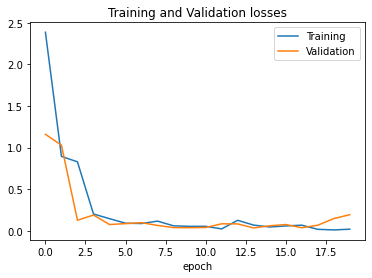

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

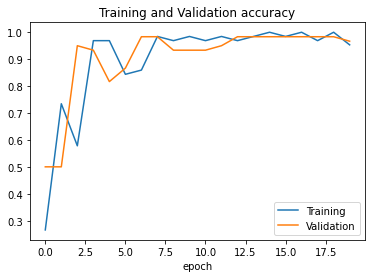

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 1s/step - loss: 0.0292 - accuracy: 0.9667
test loss :0.02916327305138111   test accuracy :0.9666666388511658
